In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer.csv')
df.drop('Customer ID', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.drop('Customer Name', axis=1, inplace=True)
df

,Segment,Age,City,State,Postal Code,Region
0,Consumer,67,Henderson,Kentucky,42420,South
1,Corporate,31,Los Angeles,California,90036,West
2,Consumer,65,Fort Lauderdale,Florida,33311,South
3,Consumer,20,Los Angeles,California,90032,West
4,Consumer,50,Concord,North Carolina,28027,South
...,...,...,...,...,...,...
788,Corporate,64,Philadelphia,Pennsylvania,19140,East
789,Home Office,39,Burlington,Iowa,52601,Central
790,Consumer,69,Arlington Heights,Illinois,60004,Central
791,Consumer,35,Kent,Ohio,44240,East


In [3]:
df['Age'] = df['Age'].astype(int)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Segment      793 non-null    object
 1   Age          793 non-null    int64 
 2   City         793 non-null    object
 3   State        793 non-null    object
 4   Postal Code  793 non-null    int64 
 5   Region       793 non-null    object
dtypes: int64(2), object(4)
memory usage: 37.3+ KB


<AxesSubplot:>

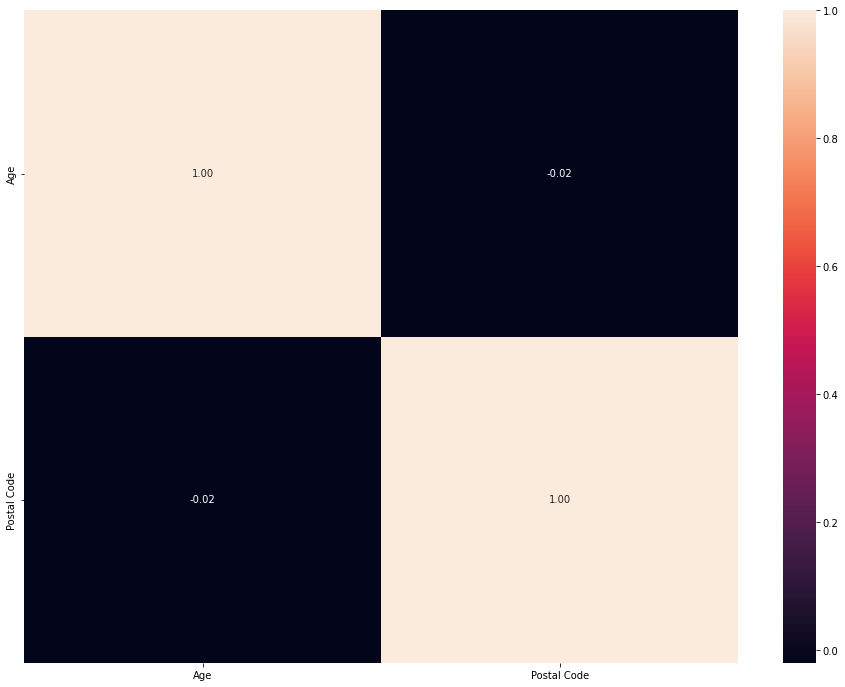

In [5]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f')

In [6]:
label = LabelEncoder()


y = df['Segment'].values
df.drop('Segment', axis=1, inplace=True)
x = df.iloc[:, :-1]
x

,Age,City,State,Postal Code
0,67,Henderson,Kentucky,42420
1,31,Los Angeles,California,90036
2,65,Fort Lauderdale,Florida,33311
3,20,Los Angeles,California,90032
4,50,Concord,North Carolina,28027
...,...,...,...,...
788,64,Philadelphia,Pennsylvania,19140
789,39,Burlington,Iowa,52601
790,69,Arlington Heights,Illinois,60004
791,35,Kent,Ohio,44240


In [7]:
cols = x.describe(include=object).columns

for col in cols:
    x[col] = label.fit_transform(x[col])
    x[col] = x[col].values

<AxesSubplot:>

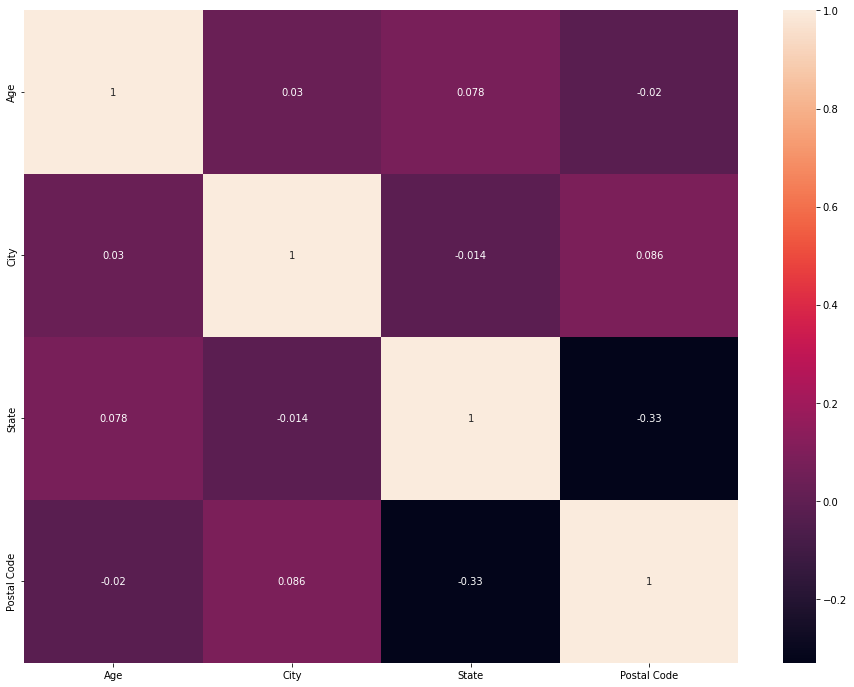

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(x.corr(method='pearson'), annot=True)

In [9]:

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)


classtree = RandomForestClassifier(max_features='log2', max_depth=5, n_estimators=1000, n_jobs=-1, criterion='entropy', warm_start=True)
classtree.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=1000, n_jobs=-1, warm_start=True)

In [10]:
pred = classtree.predict(x_test)
print('accuracy_score: ', accuracy_score(y_test, pred))

accuracy_score:  0.5336134453781513
